In [154]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data paths

In [155]:
DATA_PATH = r"D:\datasets_complete\datasets-projects\online+retail+ii\online_retail_II.xlsx"


# Data Variable Information
**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (£).

*CustomerID*: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

[Link to info](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

# Pipeline logic

In [156]:
    # # 1. Normalize column names
    # df = normalize_column_names(df)

    # # 2. Column 'invoice' to string
    # df = df_column_to_string(df, "invoice", show_head=False)

    # # 3 Filter out rows where 'invoice' starts with 'C'
    # df_cancellation_invoices = filter_rows_starting_with(df, "invoice", "C")

    # # 4. Remove and display unique prefixes in 'invoice' column
    # remove_and_display_unique_prefixes(df, "invoice")

    # # 5 Column 'stockcode' to string
    # df_column_to_string(df, 'stockcode')

    # # 6. Remove abnormal codes
    # stockcodes_abnormal, count_abnormal = get_abnormal_values(df, 'stockcode', print_list=True)

    # # 7 Filter out abnormal invoices ( exclude NOT 6 consecutive digits)
    # df, mask, entries_dropped = filter_consecutive_digits(df, 'invoice', 6) 
    # print("Entries dropped:", entries_dropped)

    # # 8 Drop abnormal stockcodes by list
    # df = exclude_values_by_list(df, "stockcode", stockcodes_abnormal)

    # # 9. Drop NA, duplicates, zero price
    # df = drop_na_duplicates_and_zeroes(df)


# Imports

In [157]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.functions import *
from src.pipeline import *
from src.plot_save import save_plot_to_folder


## Data read and dataframe creation (`PANDAS`)

In [159]:
# Enable the following lines to load data from excel files.
# df = pd.read_excel(DATA_PATH, sheet_name="Year 2010-2011")
# df_b = pd.read_excel(DATA_PATH, sheet_name="Year 2009-2010")


In [160]:
# Enable the following lines to save the dataframes as pickle files.
# Saved to avoid re-loading the excel file.
# df.to_pickle('df_2010-2011.pkl')
# df_b.to_pickle('df_2009-2010.pkl')


In [161]:
# Load the pre-saved pickle file
df_a_raw = pd.read_pickle('df_2010-2011.pkl')
# df_b_raw = pd.read_pickle('df_2009-2010.pkl') # Enable to access with dataframe b
display(df_a_raw.head())
# display(df_b_raw.head())


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [162]:
# 'df_a_raw' is the raw input data
df_ready_a = cleaning_pipeline(df_a_raw)
# Verify the final result
print("\nFinal Cleaned DataFrame Info:")
display(df_ready_a.info()) # This dataframe is ready for analysis
# df_ready_a.to_pickle('df_cleaned_2010-2011.pkl') # Save cleaned dataframe


'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                       description  quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  price  customer_id         country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
Results for prefix: 'C'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Results for prefix: 'A'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


'stockcode' converted to string type.
object
33 abnormal values:
['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK']
Entries dropped: 9291
Removed 2409 rows where 'stockcode' was in the exclusion list.
Number of duplicated rows: 5187
Duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


Duplicates dropped.
Rows with price equal to 0:


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Rows with price equal to 0 removed.

Final Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      391150 non-null  object        
 1   stockcode    391150 non-null  object        
 2   description  391150 non-null  object        
 3   quantity     391150 non-null  int64         
 4   invoicedate  391150 non-null  datetime64[ns]
 5   price        391150 non-null  float64       
 6   customer_id  391150 non-null  float64       
 7   country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


None

In [163]:
# df_b = df_b_raw.copy()


# # 'df_b' is the raw input data
# df_ready_b = cleaning_pipeline(df_b)

# # Verify the final result
# print("\nFinal Cleaned DataFrame Info:")
# display(df_ready_b.info()) # This dataframe is ready for analysis
# # df_ready_b.to_pickle('df_cleaned_2009-2010.pkl') # Save cleaned dataframe


# EDA

This EDA is automated in cells 25 and 26, with df_ready_a & df_ready_b respectively. For transparency the process of how cleaning was implemented you can explore these following cells.

In [164]:
display(df_a_raw.describe())
display(df_a_raw.describe(include=['O'])) # Includes object type columns


,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


,Invoice,StockCode,Description,Country
count,541910,541910,540456,541910
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [165]:
# Usage
df = normalize_column_names(df_a_raw) # Implement normalize_column_names function

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      541910 non-null  object        
 1   stockcode    541910 non-null  object        
 2   description  540456 non-null  object        
 3   quantity     541910 non-null  int64         
 4   invoicedate  541910 non-null  datetime64[ns]
 5   price        541910 non-null  float64       
 6   customer_id  406830 non-null  float64       
 7   country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [166]:
df_column_names = df.columns.to_list()
# df_column_names


# EDA Notes

Client Clustering

- `541910` entries, `Description` and `Customer ID` do not match the number of entries (missing values).
- Negative values in `Quantity`: `-80995.000000`. It matches the **max** amount.
- Negative values in `Price`: `-11062.060000`.
- `25900` unique `Invoice` values.
- `4070` unique `StockCode` values, meaning 4070 products; but `4223` `Description` values.

### `invoice` column

In [167]:
# df[df['quantity']<0].head() # Overview of `quantity` negative values 


In [168]:
# df['invoice'] = df['invoice'].astype('str')
df = df_column_to_string(df, 'invoice') # Using the function to convert 'invoice' column to string type.

df_cancellation_invoices = filter_rows_starting_with(df, 'invoice', 'C')
# df[df['invoice'].str.match("^\\d{6}$") == False] # Regex for NOT 6 consecutive numbers as invoice id

print("Invoices that are cancellations:", df_cancellation_invoices.shape[0]) # According to the data information website


'invoice' converted to string type.
object
Filtered rows where 'invoice' starts with 'C'
     invoice stockcode                       description  quantity  \
141  C536379         D                          Discount        -1   
154  C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235  C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236  C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237  C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  price  customer_id         country  
141 2010-12-01 09:41:00  27.50      14527.0  United Kingdom  
154 2010-12-01 09:49:00   4.65      15311.0  United Kingdom  
235 2010-12-01 10:24:00   1.65      17548.0  United Kingdom  
236 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
237 2010-12-01 10:24:00   0.29      17548.0  United Kingdom  
Invoices that are cancellations: 9288


In [169]:
# Other letters in 'invoice' column
# df['invoice'].str.replace("[0-9]", "", regex=True).unique()
remove_and_display_unique_prefixes(df, 'invoice')

# Output: There are invoices that start with 'C' and 'A' letters.


Results for prefix: 'C'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Results for prefix: 'A'


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


## `stockcode` column

In [170]:
df_column_to_string(df, 'stockcode')


'stockcode' converted to string type.
object


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [171]:
# stockcodes_abnormal = df[(df['stockcode'].str.match("^\\d{5}$") == False) & (df['stockcode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['stockcode'].unique()
# Regex for NOT 5 consecutive numbers or 5 consecutive numbers followed by letters in the values of 'stockcode' column
stockcodes_abnormal, count_abnormal = get_abnormal_values(df, 'stockcode', print_list=True)

# Output: There are some abnormal stockcodes
# print("Abnormal Stockcodes:", stockcodes_abnormal)


33 abnormal values:
['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE', 'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm', 'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055', 'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073', 'DCGS0071', 'DCGS0066P', 'DCGS0068', 'DCGS0067', 'B', 'CRUK']


In [172]:
# Show entries witch each abnormal stockcode in stockcodes_abnormal
# display_rows_by_list(df, 'stockcode', stockcodes_abnormal)


**`stockcode` code** | **Description** | **Implementation**
----------|----------|----------
`POST` | Postage charge. Delivery fees? | Exlcude
`D` | Discount applied | Exclude
`C2` | Shipping fee | Exclude
`DOT` | Dotcom purchase | Exclude
`M` | Manual purchase entrie | Exclude
`BANK CHARGES` | Bank fees? | Exclude
`S` | Sample product | Exclude
`AMAZONFEE` | Amazon marketplace fee | Exclude
`DCGS0076` | Gift voucher code 76 | Exclude
`DCGS0003` | Gift voucher code 3 | Exclude
`gift_0001_40` | £40 gift card | Exclude
`DCGS0070` | Gift voucher code 70 | Exclude
`m` | Manual adjustment (lowercase) | Exclude
`gift_0001_50` | £50 gift card | Exclude
`gift_0001_30` | £30 gift card | Exclude
`gift_0001_20` | £20 gift card | Exclude
`DCGS0055` | Gift voucher code 55 | Exclude
`DCGS0072` | Gift voucher code 72 | Exclude
`DCGS0074` | Gift voucher code 74 | Exclude
`DCGS0069` | Gift voucher code 69 | Exclude
`DCGS0057` | Gift voucher code 57 | Exclude
`DCGSSBOY` | Boy's gift voucher | Exclude
`DCGSSGIRL` | Girl's gift voucher | Exclude
`gift_0001_10` | £10 gift card | Exclude
`PADS` | Padding/packaging materials | Exclude Non-sale item
`DCGS0004` | Gift voucher code 4 | Exclude
`DCGS0073` | Gift voucher code 73 | Exclude
`DCGS0071` | Gift voucher code 71 | Exclude
`DCGS0066P` | Gift voucher code 66P | Exclude
`DCGS0068` | Gift voucher code 68 | Exclude
`DCGS0067` | Gift voucher code 67 | Exclude
`B` | Bad debt write-off | Exclude
`CRUK` | Cancer Research UK donation | Exclude

# Data Cleaning

In [173]:
# Copy df to df_clean for cleaning operations
df_clean = df.copy()


In [174]:
original_count = len(df_clean)


### `invoice` Filter out invoice codes that do not match "6 digits". Cancelations are not important for this analysis.

In [175]:
df_column_to_string(df_clean, 'invoice')
df_clean, mask, entries_dropped = filter_consecutive_digits(df_clean, 'invoice', 6) # Six consecutive digits as a rule for invoice IDs
print("Entries dropped:", entries_dropped)
df_clean.describe()


'invoice' is string!
Entries dropped: 9291


,quantity,invoicedate,price,customer_id
count,532619.000000,532619,532619.000000,397925.000000
mean,10.240006,2011-07-04 17:06:17.472038400,3.868438,15294.308601
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13969.000000
50%,3.000000,2011-07-20 11:54:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:21:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,159.593850,NaN,32.470417,1713.172738


### `stockcodes` filter out

In [176]:
df_clean = exclude_values_by_list(df_clean, 'stockcode', stockcodes_abnormal)
df_clean.describe()
# Change in abnormal quantity values after removing abnormal stockcodes.


Removed 2409 rows where 'stockcode' was in the exclusion list.


,quantity,invoicedate,price,customer_id
count,530210.000000,530210,530210.000000,396370.000000
mean,10.256544,2011-07-04 18:23:18.884932096,3.250016,15301.602071
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13975.000000
50%,3.000000,2011-07-20 12:05:00,2.080000,15159.000000
75%,11.000000,2011-10-19 12:35:00,4.130000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,159.899809,NaN,4.373334,1709.982593


In [177]:
# Check if any abnormal stockcode remains
# for code in stockcodes_abnormal:
#     display(df_clean[df_clean['stockcode'] == code].head(10)) 
# Output: No abnormal stockcodes remain.


1. Drop abnormal 'stockcodes'.
2. Filter out invoice codes that do not match "6 consecutive digits".
3. Filter out NaN and Nulls from 'customer_id'.
4. Erase duplicate entries.
5. Drop entries where'price' equals 0.

In [178]:
# def drop_na_duplicates_and_zeroes(df, col_customer='customer_id', col_price='price')
df_clean = drop_na_duplicates_and_zeroes(df_clean)
df_clean.describe()


Number of duplicated rows: 5187
Duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


Duplicates dropped.
Rows with price equal to 0:


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


Rows with price equal to 0 removed.


,quantity,invoicedate,price,customer_id
count,391150.000000,391150,391150.000000,391150.000000
mean,13.145300,2011-07-10 19:37:34.766713600,2.874372,15295.171456
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000
50%,6.000000,2011-07-31 12:05:00,1.950000,15159.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16794.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.807831,NaN,4.284738,1710.339033


In [179]:
len(df_clean)/len(df)


0.7217988226827333

## Notes of cleaning process

- Dropped 28% of data

# Feature Engineering

### Strategy

- Total per sale is missing. Added as `sale_total`
- Country feature encoded
- Create profiles based on `customer_id`. Added as new dataframe
- Data confusion matrix to understand better correlation

### Clean up and re import

In [180]:
# print(list(globals().keys()))


In [181]:
# %reset out # Cleans outputs


In [182]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


In [183]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.functions import *
from src.pipeline import *
from src.k_means_function import *
from src.viz_functions import *
from src.plot_save import save_plot_to_folder


In [184]:
# print(list(globals().keys()))


In [185]:
df_fe = df_ready_a.copy() # Copy dataframe from cell 25 (pipeline output)
df_fe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      391150 non-null  object        
 1   stockcode    391150 non-null  object        
 2   description  391150 non-null  object        
 3   quantity     391150 non-null  int64         
 4   invoicedate  391150 non-null  datetime64[ns]
 5   price        391150 non-null  float64       
 6   customer_id  391150 non-null  float64       
 7   country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


### Feature: `country`

In [186]:
# Encode country column One-Hot Encoding. Categorical non-ordinal variable. Encode the categories based on their frequency to avoid curse of dimensionality.

# Get unique object values in 'country' column
# print(df_fe['country'].unique().tolist())
# Count of total countries
# len(df_fe['country'].unique()) # 37 countries present


In [187]:
# Ensure 'country' column is of type string
# df_fe = df_column_to_string(df_fe, 'country') # Output: 'country' is string! 
df_fe, country_map = mean_encoder(df_fe, 'country', True) # Save country map for later

df_fe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   invoice          391150 non-null  object        
 1   stockcode        391150 non-null  object        
 2   description      391150 non-null  object        
 3   quantity         391150 non-null  int64         
 4   invoicedate      391150 non-null  datetime64[ns]
 5   price            391150 non-null  float64       
 6   customer_id      391150 non-null  float64       
 7   country_encoded  391150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 26.9+ MB


In [188]:
# Create a broader map that includes customer_id for readbility
df_country_map = pd.DataFrame(list(country_map.items()), columns=['country', 'country_encoded'])
# print(df_country_map.head())

# Creates map of client countries to their encoded values
df_customer_country = df_fe.groupby('customer_id')['country_encoded'].max().reset_index()
# print(df_customer_country.head())

# Merge both dataframes to have customer_id with country_encoded
df_map = df_customer_country.merge(
    df_country_map,
    how='left',
    left_on='country_encoded',
    right_on='country_encoded' 
)
# customer_id to int32
df_map = convert_column_to_numeric(df_map, 'customer_id',show_head=False);
print(df_map.info()) 


'customer_id' converted to int32.
Actual dtype: int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      4336 non-null   int32  
 1   country_encoded  4336 non-null   float64
 2   country          4336 non-null   object 
dtypes: float64(1), int32(1), object(1)
memory usage: 84.8+ KB
None


### Feature  `customer_id`

In [189]:
# To int
convert_column_to_numeric(df_fe, 'customer_id', show_head=False, dtype='int32')
df_fe.info()


'customer_id' converted to int32.
Actual dtype: int32
<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   invoice          391150 non-null  object        
 1   stockcode        391150 non-null  object        
 2   description      391150 non-null  object        
 3   quantity         391150 non-null  int64         
 4   invoicedate      391150 non-null  datetime64[ns]
 5   price            391150 non-null  float64       
 6   customer_id      391150 non-null  float64       
 7   country_encoded  391150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 26.9+ MB


In [190]:
print(country_map)


{'United Kingdom': 0.8919135881375432, 'Germany': 0.022096382461971112, 'France': 0.020501086539690655, 'EIRE': 0.018218074907324557, 'Spain': 0.00617921513485875, 'Netherlands': 0.0059363415569474625, 'Belgium': 0.004946951297456219, 'Switzerland': 0.004627380800204525, 'Portugal': 0.0036200945928671867, 'Australia': 0.0030167454940559888, 'Norway': 0.0026792790489582, 'Channel Islands': 0.0018995270356640674, 'Italy': 0.0018944139077080404, 'Finland': 0.0016540968937747667, 'Cyprus': 0.0015364949507861434, 'Sweden': 0.0010916528186117858, 'Austria': 0.0009817205675572032, 'Denmark': 0.0009382589799309728, 'Poland': 0.0008308832928544036, 'Japan': 0.0008206570369423495, 'Israel': 0.0006263581746133197, 'Unspecified': 0.0006161319187012655, 'Singapore': 0.0005496612552729132, 'Iceland': 0.00046529464399846604, 'USA': 0.0004576249520644254, 'Canada': 0.0003834845967020325, 'Greece': 0.0003630320848779241, 'Malta': 0.0002786654736034769, 'United Arab Emirates': 0.00017128978652690785, 'E

### Features RFM

In [191]:
df_fe = return_product_two_columns(df_fe, 'price', 'quantity', 'sale_total', True);


  invoice stockcode                          description  quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  price  customer_id  country_encoded  sale_total  
0 2010-12-01 08:26:00   2.55      17850.0         0.891914       15.30  
1 2010-12-01 08:26:00   3.39      17850.0         0.891914       20.34  
2 2010-12-01 08:26:00   2.75      17850.0         0.891914       22.00  
3 2010-12-01 08:26:00   3.39      17850.0         0.891914       20.34  
4 2010-12-01 08:26:00   3.39      17850.0         0.891914       20.34  


In [192]:
df_fe_b = df_fe.copy()
# Base of the beta version (4 features instead of 3)


## RFM

In [193]:
df_rfm = compute_rfm_features(df_fe, customer_col='customer_id', invoice_col='invoice', date_col='invoicedate', total_col='sale_total');
# This function calculates recency based on the maximum date in the dataset.
# Erases the invoicedate column.


In [194]:
print(df_rfm.head())
print(df_rfm.info())


   customer_id  sale_value  frequency  recency_days
0      12346.0    77183.60          1           325
1      12347.0     4310.00          7             1
2      12348.0     1437.24          4            74
3      12349.0     1457.55          1            18
4      12350.0      294.40          1           309
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   4334 non-null   float64
 1   sale_value    4334 non-null   float64
 2   frequency     4334 non-null   int64  
 3   recency_days  4334 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 135.6 KB
None


### RFM Outlier detection

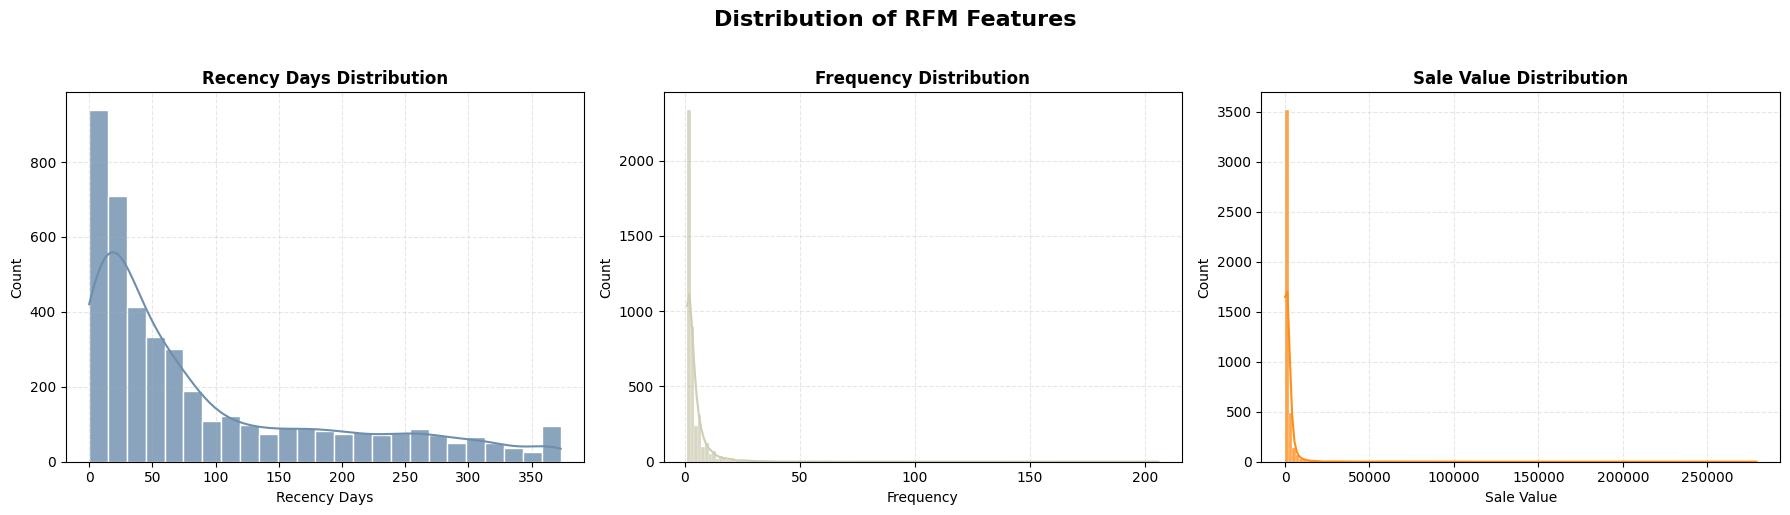

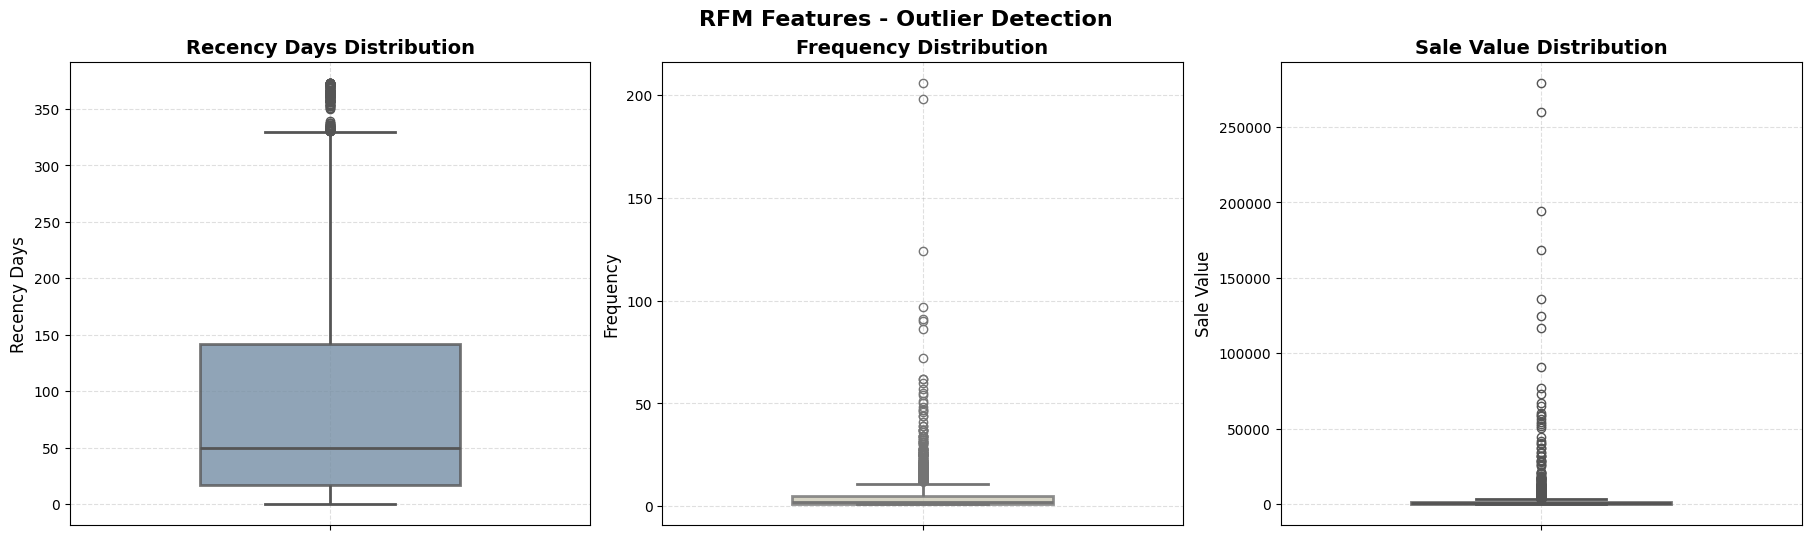

In [195]:
# Columns to plot Histograms and Boxplots
columns_to_plot = ['recency_days', 'frequency', 'sale_value']
custom_colors = ['#6D8EAD', '#CFCDB4', '#FF8E19'] # Color palette for the plots

# Graphs PRE-TRANSFORMATION
fig_hist, fig_box = plot_rfm_distributions(df_rfm, columns_to_plot, custom_colors)

plt.show()


c:\Users\arq_c\Desktop\repo_collabs\.data_env\Lib\site-packages\seaborn\categorical.py:700: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



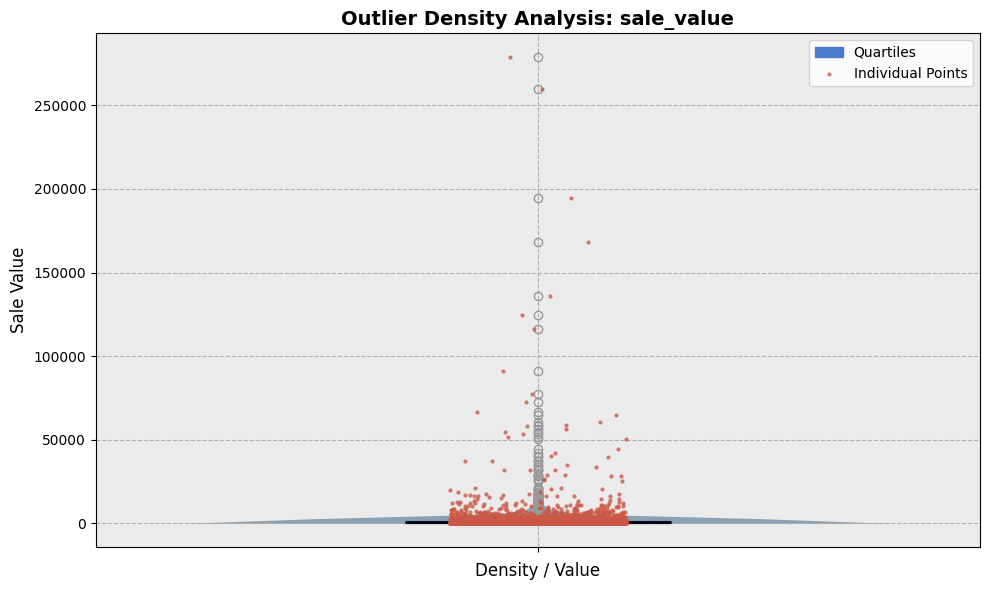

c:\Users\arq_c\Desktop\repo_collabs\.data_env\Lib\site-packages\seaborn\categorical.py:700: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



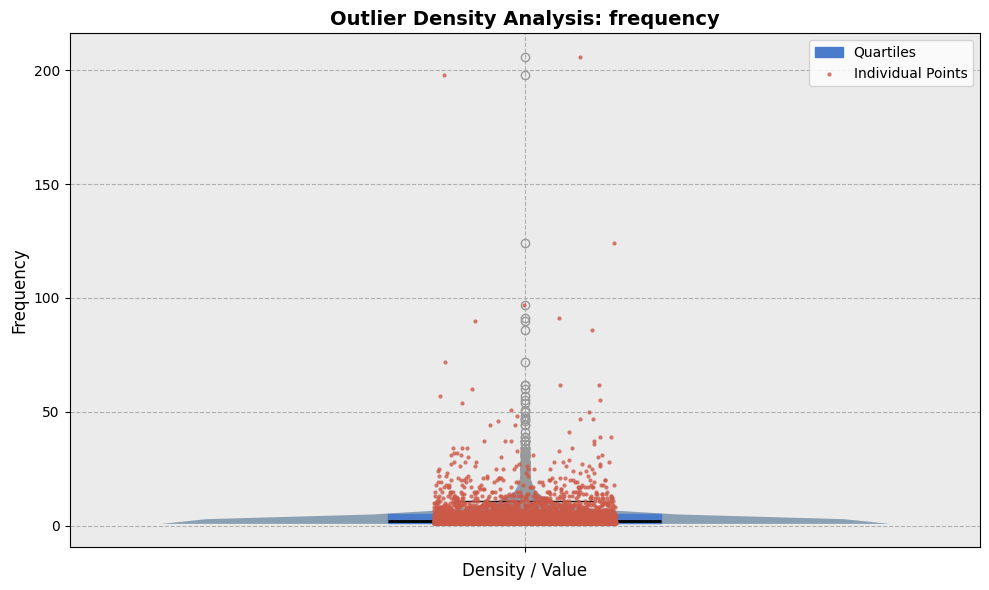

In [196]:
# Density of outliers dataframe df_rfm
plot_outlier_density(df_rfm, 'sale_value')
plot_outlier_density(df_rfm, 'frequency')


### Outlier treatment

#### **OPTION A** Logaritmic transformation

In [197]:
columns_to_transform =['frequency', 'sale_value']
df_log = log_transform_column(df_rfm, columns_to_transform, True)
print(df_log.info())
df_log.describe()

columns_to_plot = df_log.columns.to_list()
# print(columns_to_plot) # ['customer_id', 'recency_days', 'frequency_log', 'sale_value_log']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     4334 non-null   float64
 1   recency_days    4334 non-null   int64  
 2   frequency_log   4334 non-null   float64
 3   sale_value_log  4334 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 135.6 KB
None


(<Figure size 1800x500 with 3 Axes>, <Figure size 1800x500 with 3 Axes>)

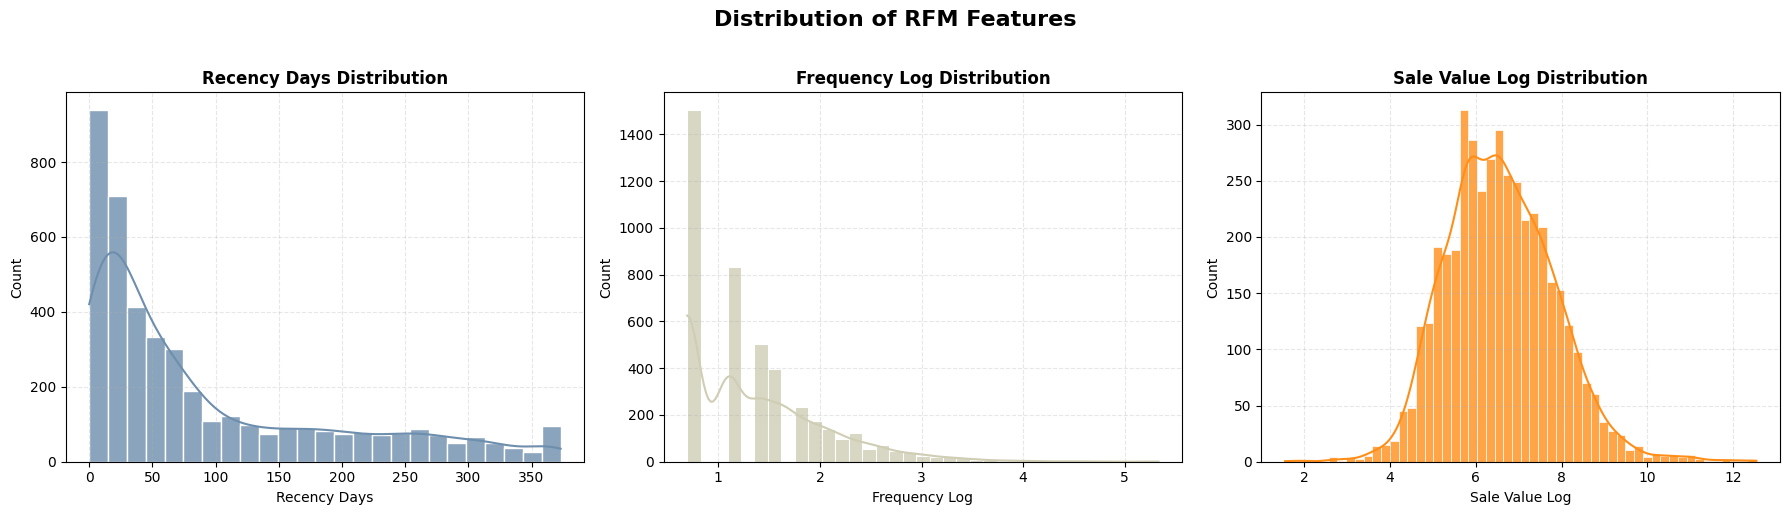

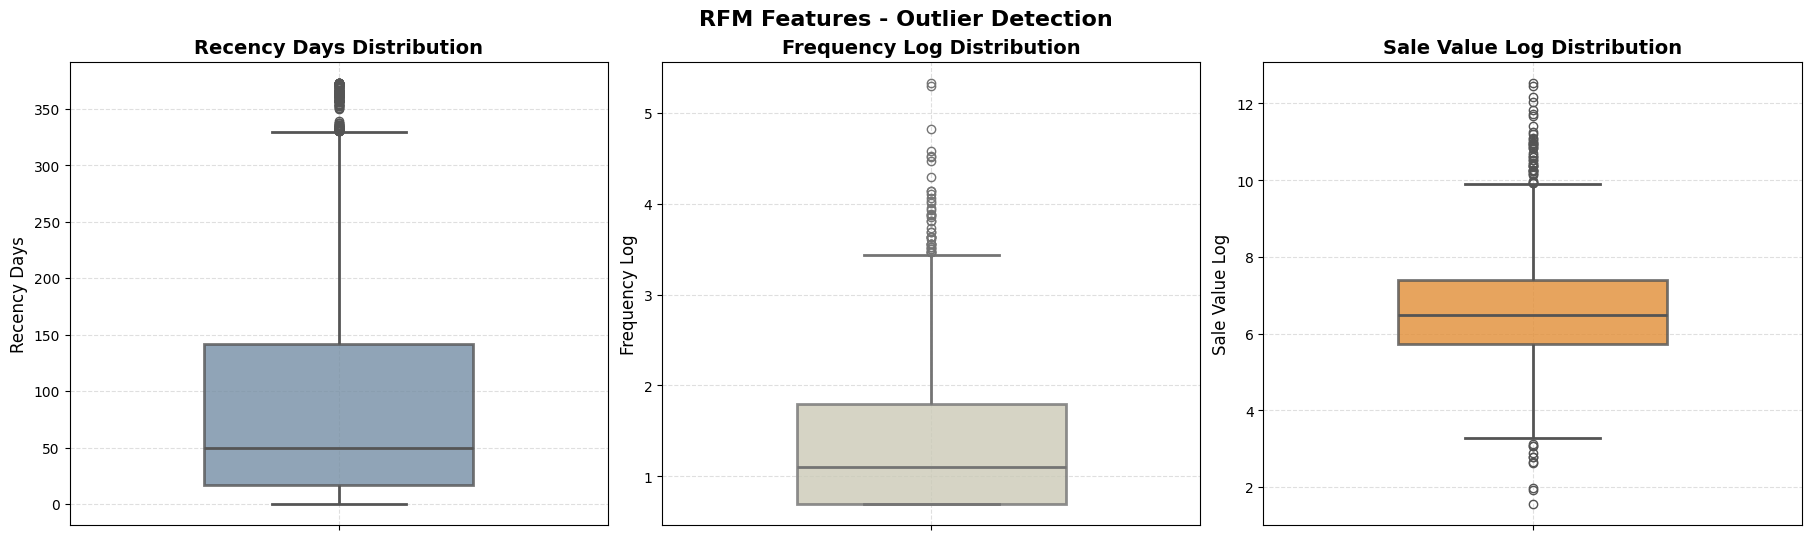

In [198]:
plot_rfm_distributions(df_log, columns_to_plot[1:], custom_colors)
# columns_to_plot[1:] to exclude 'customer_id' from the plots


#### Test of density of outliers

c:\Users\arq_c\Desktop\repo_collabs\.data_env\Lib\site-packages\seaborn\categorical.py:700: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



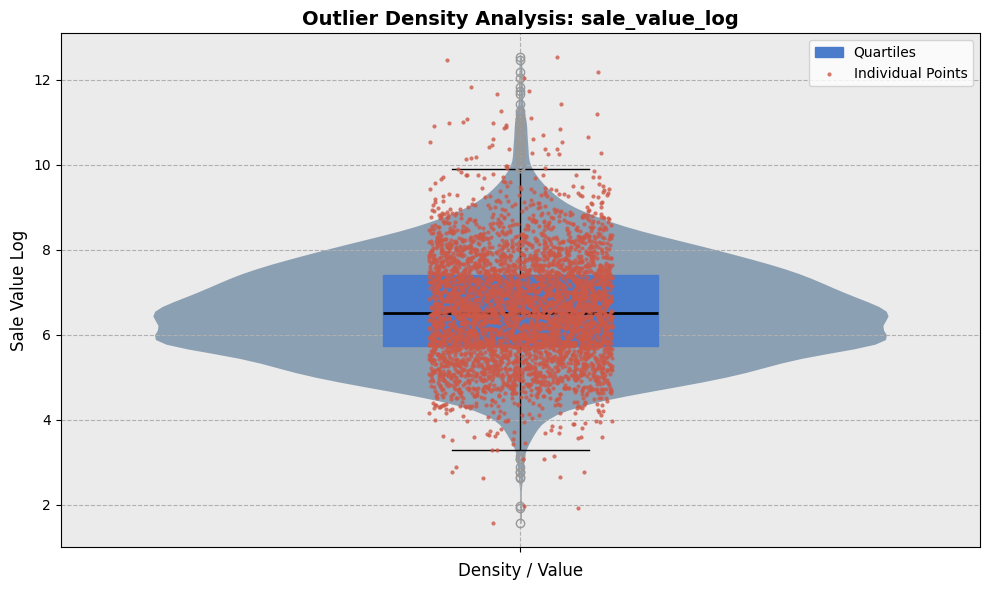

c:\Users\arq_c\Desktop\repo_collabs\.data_env\Lib\site-packages\seaborn\categorical.py:700: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



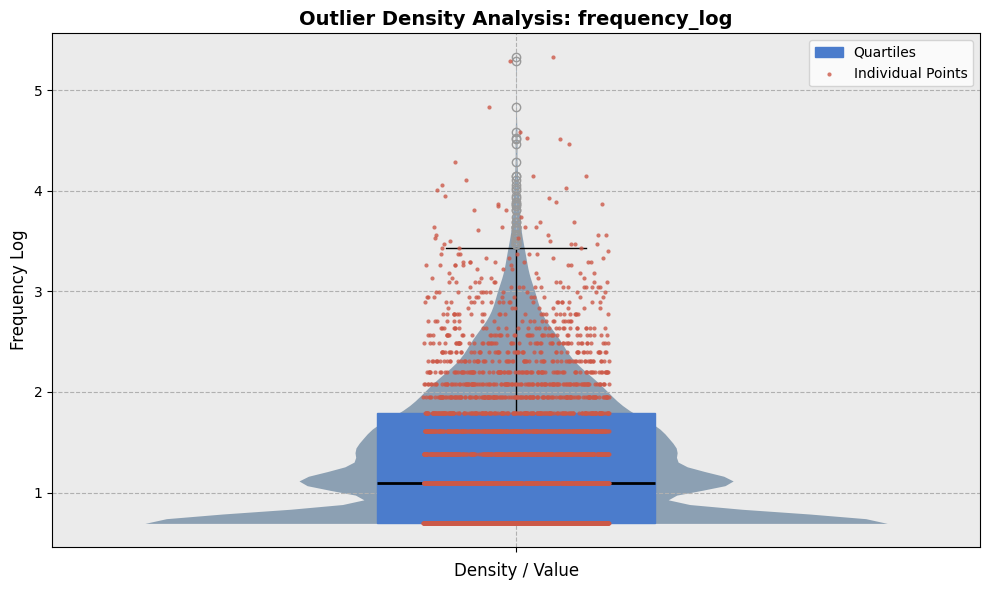

In [199]:
plot_outlier_density(df_log, 'sale_value_log')
plot_outlier_density(df_log, 'frequency_log')


### 3D scatter plot pre-KMeans overview

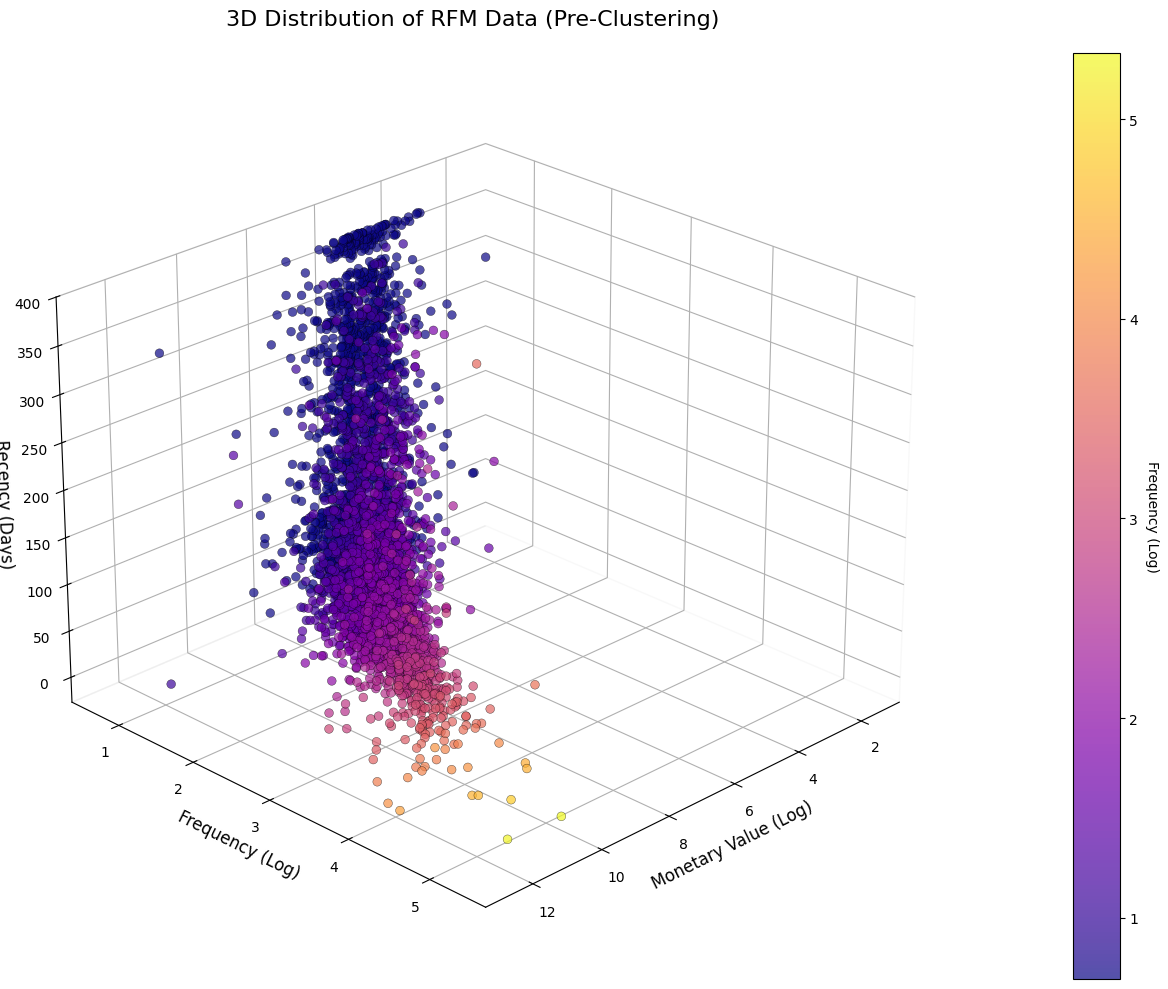

In [200]:
plot_3d_preview(df_log, palette='plasma', elev=25, azim=45, title='3D Distribution of RFM Data (Pre-Clustering)');


# Model tunning

## Scaling for KMeans

Standard Scaling is the best approach for K-Means because the algorithm relies entirely on Euclidean distance to form clusters. K-Means naturally assumes features are measured on the same scale; without standardization, variables with larger magnitudes will mathematically dominate the distance calculation.

Data roughly follows a normal distribution (Gaussian). This is the best practice for K-Means.

In [201]:
# df_log = set_column_as_index(df_log, 'customer_id') # Implement without re ordering


In [202]:
# List of logarithmic transformed features
cols_to_scale = ['sale_value_log', 'frequency_log', 'recency_days']

df_scaled, scaler = apply_standard_scaling(df_log, cols_to_scale)

print(df_scaled.head())


   sale_value_log  frequency_log  recency_days
0        3.728238      -0.951280      2.329115
1        1.429174       1.082291     -0.905532
2        0.554384       0.392837     -0.176738
3        0.565558      -0.951280     -0.735813
4       -0.706976      -0.951280      2.169379


In [203]:
df_fe_b = return_product_two_columns(df_fe_b, 'price', 'quantity', 'sale_total', False);
# print(df_fe_b.info())


In [204]:
df_rfm_b = compute_rfm_features(df_fe_b, customer_col='customer_id', invoice_col='invoice', date_col='invoicedate', total_col='sale_total');

# print(df_rfm_b.info())
# Add country encoded with df_map
df_rfm_b = df_rfm_b.merge(
    df_map[['customer_id', 'country_encoded']],
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
# print(df_rfm_b.info())


In [205]:
df_rfm_b = set_column_as_index(df_rfm_b, 'customer_id');
# print(df_rfm_b.info())


In [206]:
columns_to_transform.append('country_encoded')
df_log_b = log_transform_column(df_rfm_b, columns_to_transform, True);
# print(df_log_b.info())


In [207]:
# Scale another version of the dataframe with 4 features
# Add country to previous list of columns to scale cols_to_scale + "country_encoded"
cols_to_scale = df_log_b.columns.to_list()
print(cols_to_scale)

df_scaled_beta, scaler_b = apply_standard_scaling(df_log_b, cols_to_scale)
print(df_scaled_beta.head())


['recency_days', 'frequency_log', 'sale_value_log', 'country_encoded_log']
         recency_days  frequency_log  sale_value_log  country_encoded_log
12346.0      2.329521      -0.951196        3.728854             0.327455
12347.0     -0.905737       1.082632        1.429318            -3.109258
12348.0     -0.176805       0.393091        0.554347            -3.102852
12349.0     -0.735985      -0.951196        0.565524            -3.101558
12350.0      2.169756      -0.951196       -0.707272            -3.097334


## Elbow method

In [208]:
from src.elbow_method import *


Calculating Inertia for K values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


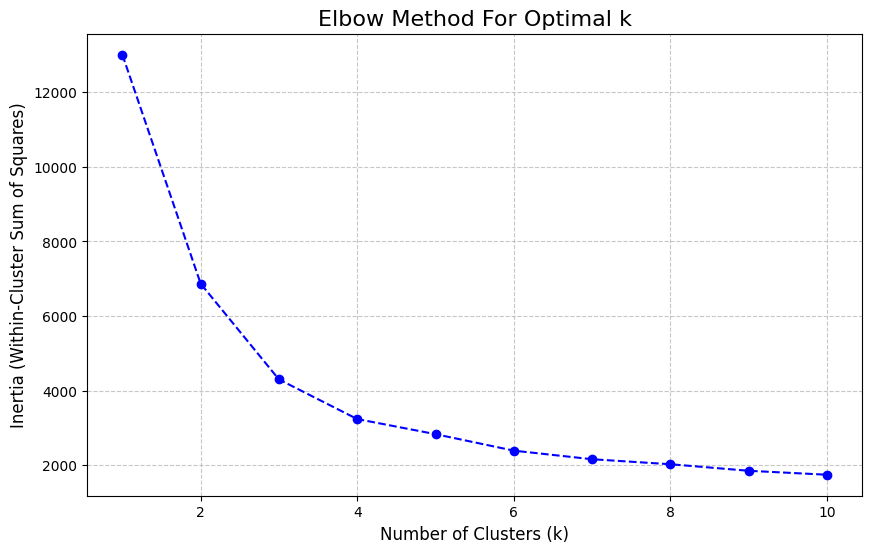

Calculating Inertia for K values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


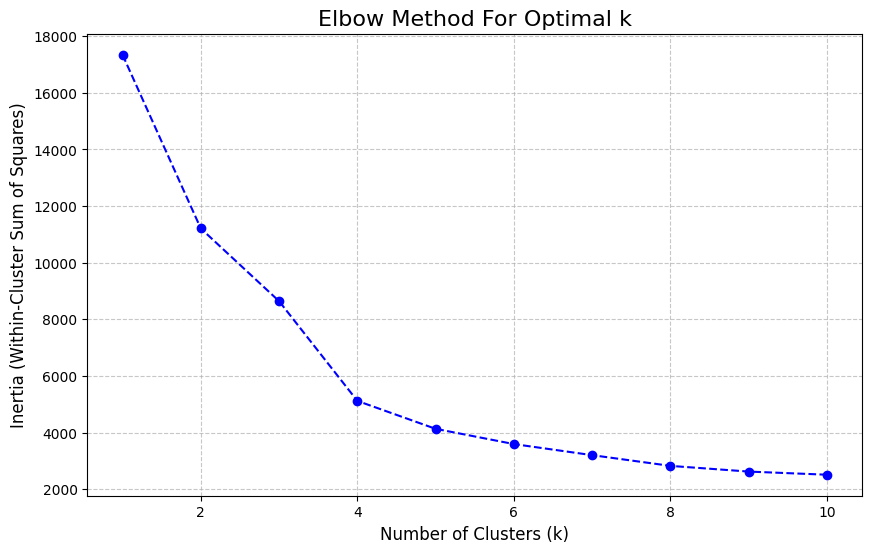

In [209]:
plot_elbow_method(df_scaled, k_range=range(1,11)) # Main dataframe
plot_elbow_method(df_scaled_beta, k_range=range(1,11)) # Beta dataframe with 4 features


## K-Means implementation

In [210]:
from src.k_means_function import *
from src.viz_functions import *
import joblib
import plotly.express as px


In [211]:
df_cluster, kmeans_model = apply_kmeans(df_scaled, n_clusters=5); # Defatul n of clusters = 3, default random_state = 123, returns a df
# print(df_cluster)
df_pca, pca_model = apply_pca(df_cluster, plot_variance=False);
# Save model
joblib.dump(kmeans_model, 'kmeans_model.pkl')


# Beta (4 features)
# df_cluster_b, kmeans_model_b = apply_kmeans(df_scaled_beta)
# # print(df_cluster_b)
# # features_beta = ['sale_value_log', 'frequency_log', 'recency_days', 'country_encoded']
# df_pca_beta, pca_model_b = apply_pca(df_cluster_b, plot_variance=False) # Defatul n of clusters = 3, default random_state = 123, returns a df
# # # Save model
# joblib.dump(kmeans_model_b, 'kmeans_model_b.pkl')


Model fitted.
Applying PCA on 3 features: ['sale_value_log', 'frequency_log', 'recency_days']
Explained Variance Ratio: [0.72045357 0.21603533]
Total Variance Explained by 2 components: 93.65%


['kmeans_model.pkl']

## Model Visualization

c:\Users\arq_c\Desktop\repo_collabs\.data_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



Saved PCA plot to: graph_img\pca_clusters_visualization.png


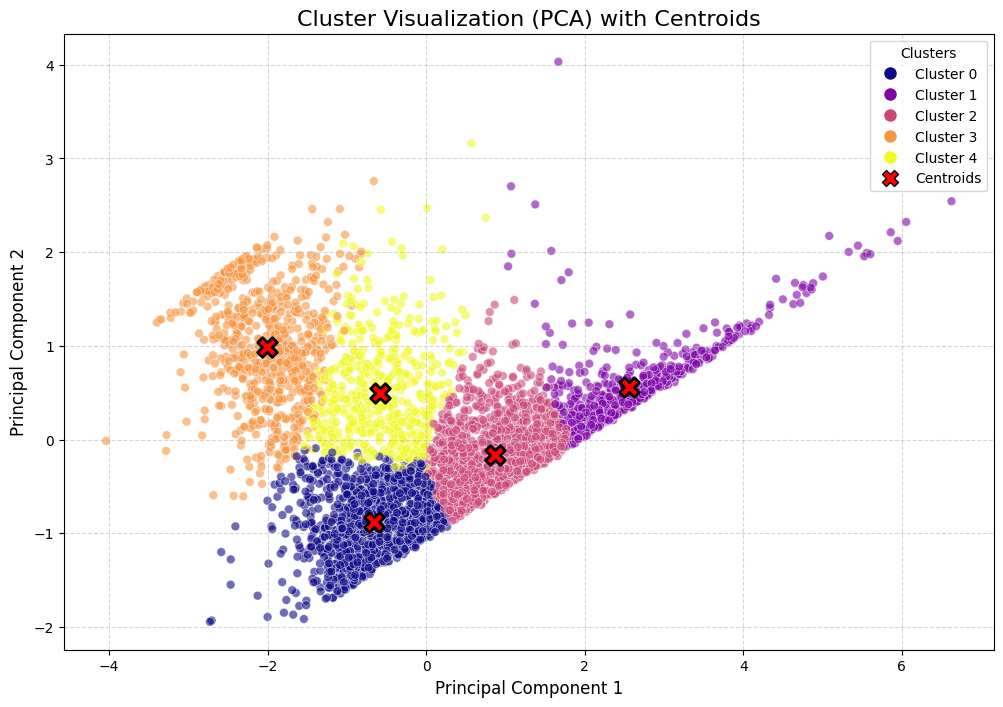

In [212]:
visualize_pca(df_pca, df_cluster, kmeans_model, pca_model, save_path='graph_img', filename='pca_clusters_visualization.png')

# visualize_pca(df_pca_beta, df_cluster_b, kmeans_model_b, pca_model_b, save_path='graph_img', filename='pca_beta_clusters_visualization.png')


## Cluster Description

In [213]:
df_real_values = df_rfm[['sale_value', 'frequency', 'recency_days']].copy()
df_real_values['cluster'] = df_cluster['cluster'].values
# print(df_real_values.describe())
cluster_grouped = df_real_values.groupby('cluster')

# print(df_real_values.info())


In [214]:
plot_cluster_means_comparison(df_real_values)


Saved interactive charts to:
 - graph_img\mean_sale_value.html
 - graph_img\mean_frequency.html
 - graph_img\mean_recency.html


c:\Users\arq_c\Desktop\repo_collabs\ds_projects_collabs\1-cluster_retail_uci\src\viz_functions.py:296: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Saved Boxplots to: graph_img\rfm_boxplots.png


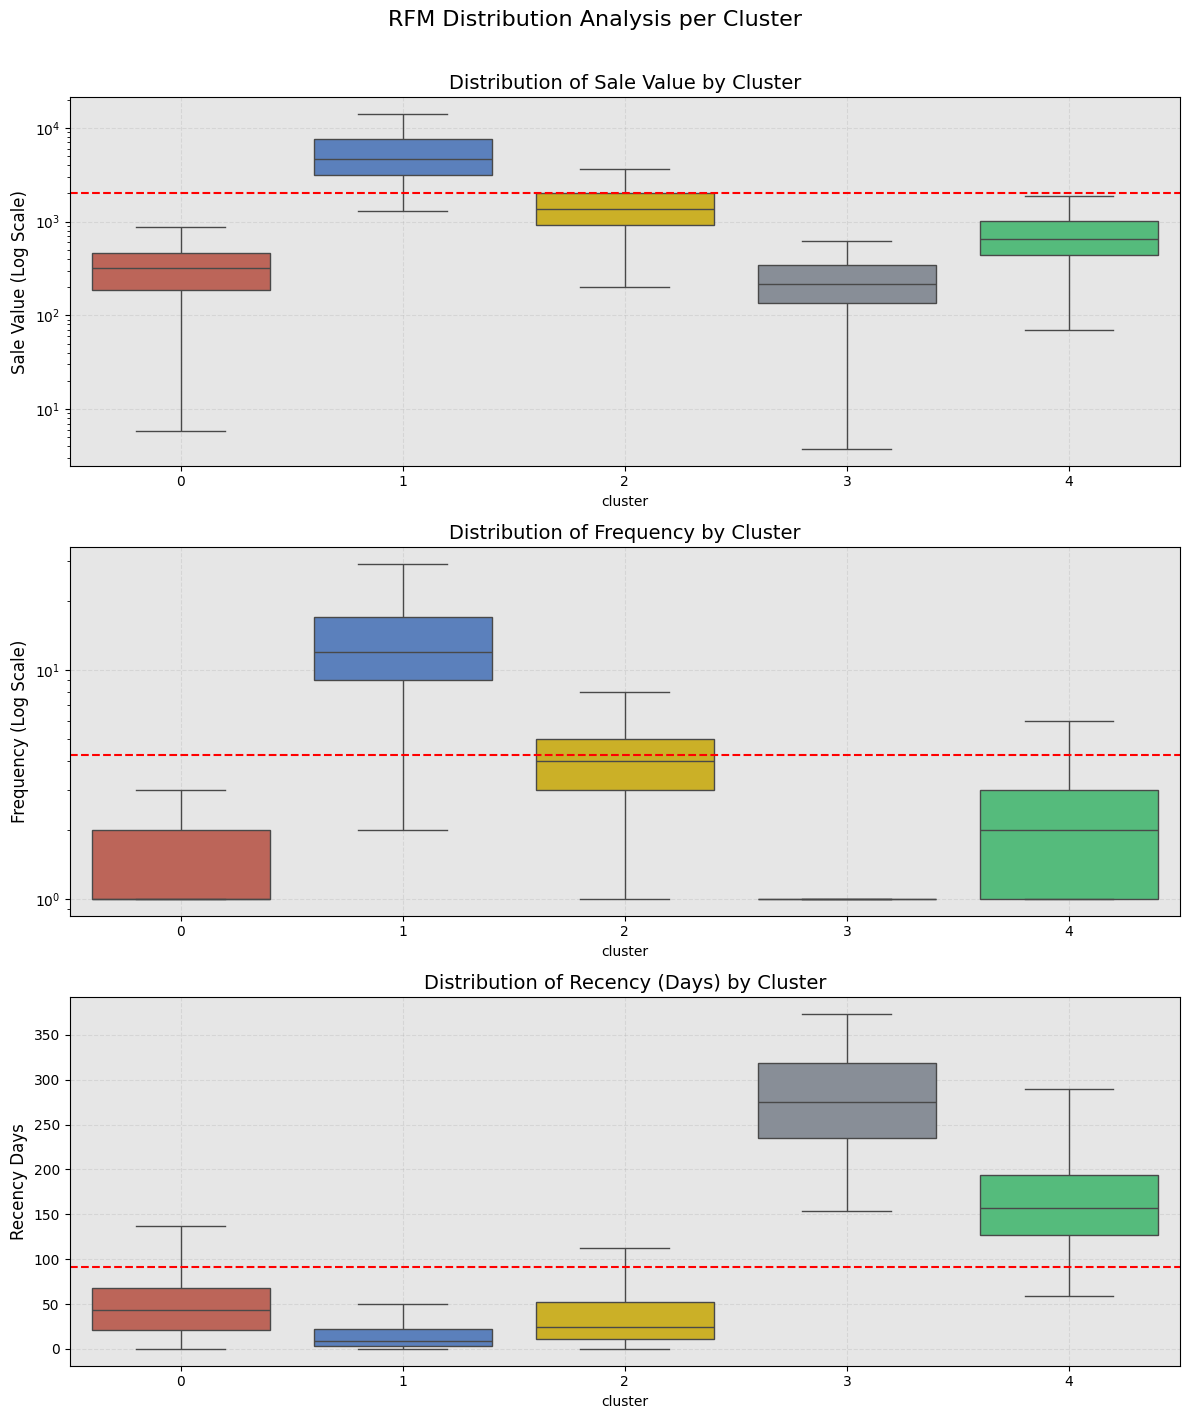

In [215]:
plot_rfm_boxplots(df_real_values)


## Cluster tag

In [216]:
cluster_map_names = {
    0: 'At-Risk Customers',
    1: 'Top-Value Customers',
    2: 'High-Value Customers',
    3: 'Average Customers'
}
# 0: 'Cluster 0 - At-Risk Customers',
# 1: 'Cluster 1 - Top-Value Customers',
# 2: 'Cluster 2 - High-Value Customers',
# 3: 'Cluster 3 - Average Customers'

# Map cluster numbers to names
df_real_values['cluster_name'] = df_real_values['cluster'].map(cluster_map_names)
print(df_real_values.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_value    4334 non-null   float64
 1   frequency     4334 non-null   int64  
 2   recency_days  4334 non-null   int64  
 3   cluster       4334 non-null   int32  
 4   cluster_name  3798 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 152.5+ KB
None


In [217]:
cols = df_real_values.columns.to_list()
cluster_desc = describe_clusters(df_real_values, cols)
print(cluster_desc)


         sale_value  frequency  recency_days  n_customers
cluster                                                  
0            351.50       1.46         47.23         1205
1          10068.40      16.22         18.63          539
2           1612.97       4.40         34.84         1342
3            277.86       1.17        276.14          712
4            978.29       2.18        162.54          536


In [224]:
from src.viz_functions import *


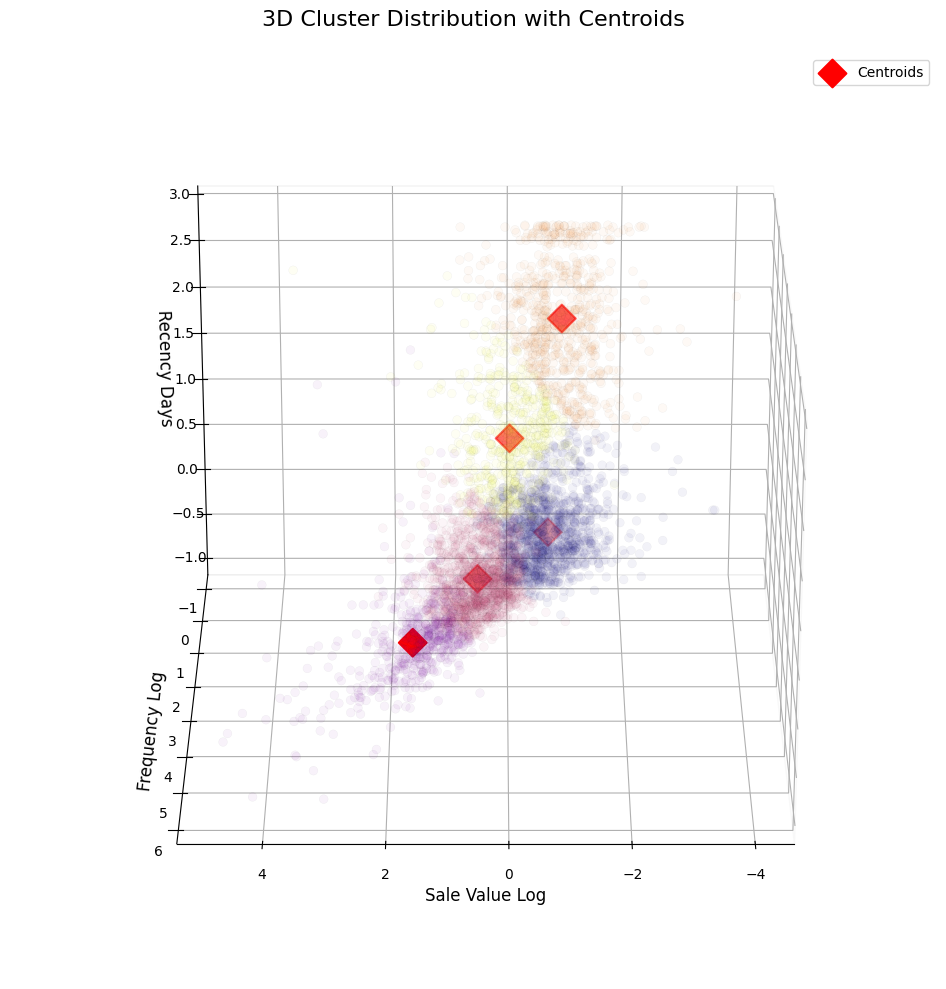

In [ ]:
# 3 columns to visualize
viz_cols = ['sale_value_log', 'frequency_log', 'recency_days']

# Call the function
plot_3d_with_cluster(df_cluster, kmeans_model, cols_to_plot=viz_cols);
